In [ ]:
df_full = pd.read_csv('ufc_datalens.csv')

df_all = joblib.load('df_all.pkl')

# Re state

In [32]:
import re
l = ['Clinch_r', 'Ground_l', 'Td_l_1', 'Td_r_1']
#поиск совпадения с начала строки
re.match('Clin', l[0])
#поиск совпадения
re.search(r'_r$', l[0])
#замена выражения
re.sub(r'_r$', r'_d', l[0])
re.sub(r'_r([^a-z]{1})', r'_d\1', l[3])
re.sub(r'_l(([^a-z]{1})|$)', r'\1', l[2])

'Td_1'

# MultiIndex ops

In [75]:
ser1 = pd.Series([1,2,3,4,5], index=pd.MultiIndex.from_tuples([(0,0),(1,2),(2,2),(3,3),(4,4)], names=['second', 'first']))
ser1

second  first
0       0        1
1       2        2
2       2        3
3       3        4
4       4        5
dtype: int64

In [76]:
ser2 = pd.Series([5,6,7,8,9], index=pd.MultiIndex.from_tuples([(0,0), (1,2),(2,2),(3,1),(4,1)], names=['first', 'second']))
ser2

first  second
0      0         5
1      2         6
2      2         7
3      1         8
4      1         9
dtype: int64

In [77]:
ser1 - ser2

second  first
0       0       -4.0
1       2        NaN
        3        NaN
        4        NaN
2       1        NaN
        2       -4.0
3       3        NaN
4       4        NaN
dtype: float64

# Written

## Plot cat

In [28]:
fighter_stat = df_full['Fighter'].value_counts().reset_index().rename(columns={'index':'name', 'Fighter':'count'})
fighter_stat = fighter_stat[fighter_stat['count']>30]

<AxesSubplot:xlabel='name', ylabel='count'>

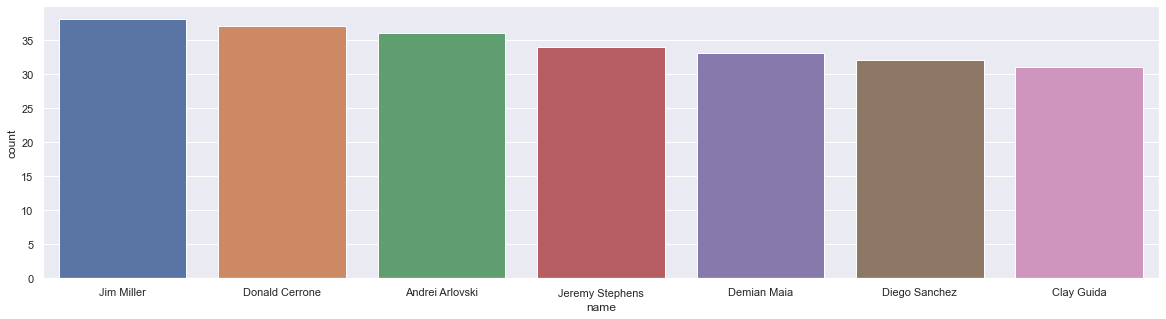

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(20,5))
sns.barplot(data=fighter_stat, x = 'name', y = 'count')


## Find Null

In [145]:
# show list of cols with at least 1 null
df_all.filter(regex='stat').isnull().any(axis=0)

kd_stat                 True
kd_dam_stat             True
sub_att_stat            True
sub_att_dam_stat        True
rev_stat                True
rev_dam_stat            True
sig_str_stat            True
sig_str_dam_stat        True
sig_str_h_stat          True
sig_str_h_dam_stat      True
sig_str_l_stat          True
sig_str_l_dam_stat      True
sig_str_b_stat          True
sig_str_b_dam_stat      True
sig_str_d_stat          True
sig_str_d_dam_stat      True
sig_str_cl_stat         True
sig_str_cl_dam_stat     True
sig_str_gr_stat         True
sig_str_gr_dam_stat     True
td_stat                 True
td_dam_stat             True
ctrl_stat              False
ctrl_dam_stat          False
win_stat               False
lose_stat              False
dtype: bool

In [140]:
# alternative way, but now False is indicator
df_all.filter(regex='stat').notnull().all(axis=0)

kd_stat                False
kd_dam_stat            False
sub_att_stat           False
sub_att_dam_stat       False
rev_stat               False
rev_dam_stat           False
sig_str_stat           False
sig_str_dam_stat       False
sig_str_h_stat         False
sig_str_h_dam_stat     False
sig_str_l_stat         False
sig_str_l_dam_stat     False
sig_str_b_stat         False
sig_str_b_dam_stat     False
sig_str_d_stat         False
sig_str_d_dam_stat     False
sig_str_cl_stat        False
sig_str_cl_dam_stat    False
sig_str_gr_stat        False
sig_str_gr_dam_stat    False
td_stat                False
td_dam_stat            False
ctrl_stat               True
ctrl_dam_stat           True
win_stat                True
lose_stat               True
dtype: bool

In [137]:
# look at rows
df_all[df_all.filter(regex='stat').isnull().any(axis=1)]

,Event,Fighter,Opponent,Result,Method:,Round:,Time:,Time format:,Referee:,Details:,Date,Event_place,Sig. str,Sig. str_d,Sig. str. %,Sig. str. %_d,Head,Head_d,Body,Body_d,Leg,Leg_d,Distance,Distance_d,Clinch,Clinch_d,Ground,Ground_d,kd_stat,kd_dam_stat,Sig. str.,Sig. str._d,Total str.,Total str._d,Td,Td_d,Td %,Td %_d,sub_att_stat,sub_att_dam_stat,rev_stat,rev_dam_stat,Ctrl,Ctrl_d,KD_1,KD_d_1,Sig. str._1,Sig. str._d_1,Sig. str. %_1,Sig. str. %_d_1,...,Head_d_4,Body_4,Body_d_4,Leg_4,Leg_d_4,Distance_4,Distance_d_4,Clinch_4,Clinch_d_4,Ground_4,Ground_d_4,Sig. str_5,Sig. str_d_5,Head_5,Head_d_5,Body_5,Body_d_5,Leg_5,Leg_d_5,Distance_5,Distance_d_5,Clinch_5,Clinch_d_5,Ground_5,Ground_d_5,judges,judge1,judge2,judge3,sig_str_stat,sig_str_dam_stat,sig_str_h_stat,sig_str_h_dam_stat,sig_str_l_stat,sig_str_l_dam_stat,sig_str_b_stat,sig_str_b_dam_stat,sig_str_d_stat,sig_str_d_dam_stat,sig_str_cl_stat,sig_str_cl_dam_stat,sig_str_gr_stat,sig_str_gr_dam_stat,td_stat,td_dam_stat,ctrl_stat,ctrl_dam_stat,time,win_stat,lose_stat
29,UFC 4: Revenge of the Warriors,Marcus Bossett,Eldo Xavier Dias,W,KO/TKO,1,4:55,No Time Limit,John McCarthy,to,1994-12-16,"Tulsa, Oklahoma, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4.916667,1,0
31,UFC 4: Revenge of the Warriors,Joe Charles,Kevin Rosier,W,Submission,1,0:14,No Time Limit,John McCarthy,Armbar,1994-12-16,"Tulsa, Oklahoma, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.233333,1,0
49,UFC 6: Clash of the Titans,Joel Sutton,Jack McGlaughlin,W,KO/TKO,1,2:01,1 Rnd (20),John McCarthy,Punches to Head From Back Control_Submission t...,1995-07-14,"Casper, Wyoming, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.016667,1,0
54,UFC 6: Clash of the Titans,Anthony Macias,He-Man Gipson,W,KO/TKO,1,3:06,1 Rnd (20),John McCarthy,Headbutts to Head From Mount_Submission to Str...,1995-07-14,"Casper, Wyoming, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,3.100000,1,0
59,UFC 7: The Brawl in Buffalo,Onassis Parungao,Francesco Maturi,W,KO/TKO,1,5:26,1 Rnd (20),John McCarthy,to_Submission to Strikes,1995-09-08,"Buffalo, New York, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5.433333,1,0
62,UFC 7: The Brawl in Buffalo,Joel Sutton,Geza Kalman,W,TKO - Doctor's Stoppage,1,0:48,1 Rnd (20),John McCarthy,NaN,1995-09-08,"Buffalo, New York, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [136]:
df_all[(df_all.filter(regex='stat').isnull().any(axis=1)&(df_all['Sig. str'].notnull()))]

,Event,Fighter,Opponent,Result,Method:,Round:,Time:,Time format:,Referee:,Details:,Date,Event_place,Sig. str,Sig. str_d,Sig. str. %,Sig. str. %_d,Head,Head_d,Body,Body_d,Leg,Leg_d,Distance,Distance_d,Clinch,Clinch_d,Ground,Ground_d,kd_stat,kd_dam_stat,Sig. str.,Sig. str._d,Total str.,Total str._d,Td,Td_d,Td %,Td %_d,sub_att_stat,sub_att_dam_stat,rev_stat,rev_dam_stat,Ctrl,Ctrl_d,KD_1,KD_d_1,Sig. str._1,Sig. str._d_1,Sig. str. %_1,Sig. str. %_d_1,...,Head_d_4,Body_4,Body_d_4,Leg_4,Leg_d_4,Distance_4,Distance_d_4,Clinch_4,Clinch_d_4,Ground_4,Ground_d_4,Sig. str_5,Sig. str_d_5,Head_5,Head_d_5,Body_5,Body_d_5,Leg_5,Leg_d_5,Distance_5,Distance_d_5,Clinch_5,Clinch_d_5,Ground_5,Ground_d_5,judges,judge1,judge2,judge3,sig_str_stat,sig_str_dam_stat,sig_str_h_stat,sig_str_h_dam_stat,sig_str_l_stat,sig_str_l_dam_stat,sig_str_b_stat,sig_str_b_dam_stat,sig_str_d_stat,sig_str_d_dam_stat,sig_str_cl_stat,sig_str_cl_dam_stat,sig_str_gr_stat,sig_str_gr_dam_stat,td_stat,td_dam_stat,ctrl_stat,ctrl_dam_stat,time,win_stat,lose_stat


In [148]:
# show list of cols with at least 1 null
df.isnull().any(axis=0)

Event         False
Fighter       False
Opponent      False
Result        False
Method:       False
              ...  
Ground_d_5     True
judges         True
judge1         True
judge2         True
judge3         True
Length: 208, dtype: bool

In [150]:
# alternative way, but now False is indicator
df.notnull().all(axis=0)

Event          True
Fighter        True
Opponent       True
Result         True
Method:        True
              ...  
Ground_d_5    False
judges        False
judge1        False
judge2        False
judge3        False
Length: 208, dtype: bool

In [151]:
# look at rows
df[df.isnull().any(axis=1)]

,Event,Fighter,Opponent,Result,Method:,Round:,Time:,Time format:,Referee:,Details:,Date,Event_place,Sig. str,Sig. str_d,Sig. str. %,Sig. str. %_d,Head,Head_d,Body,Body_d,Leg,Leg_d,Distance,Distance_d,Clinch,Clinch_d,Ground,Ground_d,KD,KD_d,Sig. str.,Sig. str._d,Total str.,Total str._d,Td,Td_d,Td %,Td %_d,Sub. att,Sub. att_d,Rev.,Rev._d,Ctrl,Ctrl_d,KD_1,KD_d_1,Sig. str._1,Sig. str._d_1,Sig. str. %_1,Sig. str. %_d_1,...,KD_5,KD_d_5,Sig. str._5,Sig. str._d_5,Sig. str. %_5,Sig. str. %_d_5,Total str._5,Total str._d_5,Td_5,Td_d_5,Td %_5,Td %_d_5,Sub. att_5,Sub. att_d_5,Rev._5,Rev._d_5,Ctrl_5,Ctrl_d_5,Sig. str_4,Sig. str_d_4,Head_4,Head_d_4,Body_4,Body_d_4,Leg_4,Leg_d_4,Distance_4,Distance_d_4,Clinch_4,Clinch_d_4,Ground_4,Ground_d_4,Sig. str_5,Sig. str_d_5,Head_5,Head_d_5,Body_5,Body_d_5,Leg_5,Leg_d_5,Distance_5,Distance_d_5,Clinch_5,Clinch_d_5,Ground_5,Ground_d_5,judges,judge1,judge2,judge3
0,UFC 1: The Beginning,Kevin Rosier,Zane Frazier,W,KO/TKO,1,4:20,No Time Limit,Joao Alberto Barreto,to_Corner Stoppage,1993-11-12,"Denver, Colorado, USA",15 of 27,12 of 28,55%,42%,12 of 23,7 of 19,3 of 4,3 of 6,0 of 0,2 of 3,4 of 10,0 of 7,4 of 9,10 of 19,7 of 8,2 of 2,2.0,0.0,15 of 27,12 of 28,38 of 53,13 of 29,0 of 0,0 of 0,---,---,0.0,0.0,0.0,0.0,--,--,2.0,0.0,15 of 27,12 of 28,55%,42%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN
1,UFC 1: The Beginning,Ken Shamrock,Patrick Smith,W,Submission,1,1:49,No Time Limit,Joao Alberto Barreto,Heel Hook From Guard,1993-11-12,"Denver, Colorado, USA",1 of 1,4 of 8,100%,50%,1 of 1,1 of 4,0 of 0,1 of 1,0 of 0,2 of 3,0 of 0,1 of 1,0 of 0,1 of 1,1 of 1,2 of 6,0.0,0.0,1 of 1,4 of 8,4 of 4,16 of 20,1 of 2,0 of 0,50%,---,2.0,0.0,0.0,0.0,--,--,0.0,0.0,1 of 1,4 of 8,100%,50%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN
2,UFC 1: The Beginning,Jason DeLucia,Trent Jenkins,W,Submission,1,0:52,No Time Limit,Joao Alberto Barreto,Rear Naked Choke,1993-11-12,"Denver, Colorado, USA",3 of 9,1 of 7,33%,14%,3 of 7,0 of 5,0 of 1,0 of 1,0 of 1,1 of 1,3 of 9,1 of 7,0 of 0,0 of 0,0 of 0,0 of 0,0.0,0.0,3 of 9,1 of 7,3 of 9,1 of 7,1 of 2,0 of 0,50%,---,1.0,0.0,0.0,0.0,--,--,0.0,0.0,3 of 9,1 of 7,33%,14%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN
3,UFC 1: The Beginning,Royce Gracie,Ken Shamrock,W,Submission,1,0:57,No Time Limit,Joao Alberto Barreto,Rear Naked Choke,1993-11-12,"Denver, Colorado, USA",0 of 0,0 of 0,---,---,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,0.0,0.0,0 of 0,0 of 0,12 of 12,0 of 0,0 of 1,0 of 1,0%,0%,1.0,0.0,1.0,0.0,--,--,0.0,0.0,0 of 0,0 of 0,---,---,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN
4,UFC 1: The Beginning,Royce Gracie,Gerard Gordeau,W,Submission,1,1:44,No Time Limit,Joao Alberto Barreto,Rear Naked Choke,1993-11-12,"Denver, Colorado, USA",1 of 2,0 of 0,50%,---,1 of 1,0 of 0,0 of 0,0 of 0,0 of 1,0 of 0,0 of 1,0 of 0,0 of 0,0 of 0,1 of 1,0 of 0,0.0,0.0,1 of 2,0 of 0,3 of 4,0 of 0,1 of 3,0 of 0,33%,---,1.0,0.0,0.0,0.0,--,--,0.0,0.0,1 of 2,0 of 0,50%,---,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

## experiments

In [21]:
sign_cols = [it for it in df_feat.columns if re.search('_stat_rol_sub', it) or it in ['Fighter', 'Opponent', 'Date', 'Result'] ]
df_feat[sign_cols]

,Fighter,Opponent,Result,Date,kd_stat_rol_sub,kd_dam_stat_rol_sub,sub_att_stat_rol_sub,sub_att_dam_stat_rol_sub,rev_stat_rol_sub,rev_dam_stat_rol_sub,sig_str_stat_rol_sub,sig_str_dam_stat_rol_sub,sig_str_h_stat_rol_sub,sig_str_h_dam_stat_rol_sub,sig_str_l_stat_rol_sub,sig_str_l_dam_stat_rol_sub,sig_str_b_stat_rol_sub,sig_str_b_dam_stat_rol_sub,sig_str_d_stat_rol_sub,sig_str_d_dam_stat_rol_sub,sig_str_cl_stat_rol_sub,sig_str_cl_dam_stat_rol_sub,sig_str_gr_stat_rol_sub,sig_str_gr_dam_stat_rol_sub,td_stat_rol_sub,td_dam_stat_rol_sub,ctrl_stat_rol_sub,ctrl_dam_stat_rol_sub,win_stat_rol_sub,lose_stat_rol_sub,wrest_w_stat_rol_sub,wrest_l_stat_rol_sub,KO_w_stat_rol_sub,KO_l_stat_rol_sub,dec_w_stat_rol_sub,dec_l_stat_rol_sub
0,Aaron Simpson,Chris Leben,0,2010-06-19,0.182097,-0.174927,-0.035455,-0.011268,0.000000,-0.004762,0.778274,-0.612287,-0.511770,-0.566858,0.256311,-0.214262,0.051514,-0.083755,0.787403,-0.316699,0.174973,-0.448284,-0.251072,-0.322197,0.269750,-0.077455,0.198398,-0.149894,0.357143,-0.357143,-0.071429,-0.142857,0.309524,-0.071429,0.119048,-0.142857
1,Aaron Simpson,Mark Munoz,0,2010-11-20,0.183985,-0.090367,0.000263,-0.136596,-0.038865,-0.025532,0.383715,-0.669203,-0.517467,-0.670551,0.469550,-0.295141,-0.218421,-0.082567,0.900990,-0.444377,0.307082,-0.035801,-0.048538,-0.053059,0.233617,-0.036667,0.206011,-0.135814,0.150000,-0.150000,0.000000,0.000000,0.100000,0.050000,0.050000,-0.200000
2,Aaron Simpson,Mario Miranda,1,2011-03-26,0.088651,-0.138408,0.021544,0.004444,-0.044444,0.013333,0.516666,-0.022816,-0.477353,-0.145729,-0.151574,0.131674,0.429912,0.117790,0.591867,-0.044938,0.289219,0.201143,-0.091618,-0.052471,0.260297,-0.084444,0.087573,-0.161687,0.266667,-0.266667,0.000000,0.000000,0.066667,-0.133333,0.200000,-0.133333
3,Aaron Simpson,Eric Schafer,1,2011-10-08,0.112753,-0.019048,-0.243826,0.009524,-0.078645,-0.032468,0.021187,-0.158159,-0.049502,-0.322242,0.095995,-0.098673,0.289399,-0.059440,0.399634,-0.252388,0.035777,-0.095102,0.016987,-0.228104,0.119265,-0.028571,-0.102585,-0.139219,0.285714,-0.285714,-0.285714,0.000000,0.142857,-0.142857,0.428571,-0.142857
4,Aaron Simpson,Mike Pierce,0,2012-10-05,0.078664,0.000000,-0.013014,0.005926,0.000000,0.006667,0.316895,0.117574,-0.018716,0.059334,0.073055,-0.012221,0.156678,-0.128157,0.303824,0.195900,0.036090,0.154145,-0.049978,0.067842,0.030754,-0.018519,0.060360,0.020398,0.033333,-0.033333,-0.111111,0.000000,0.088889,0.100000,0.055556,-0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5019,Zhang Weili,Joanna Jedrzejczyk,1,2020-03-07,0.352015,-0.028298,0.132670,0.008462,0.016667,0.000000,3.378257,1.732386,2.552250,0.505302,2.216580,0.355845,2.872713,0.925389,1.756071,0.757315,1.204427,0.911461,0.972908,-0.227058,0.102489,-0.092389,0.191516,-0.129337,0.230769,-0.230769,0.250000,0.000000,0.096154,-0.076923,-0.115385,-0.153846
5020,Zhang Weili,Rose Namajunas,0,2021-04-24,0.227527,0.000000,0.029425,0.004587,0.000485,0.000000,2.417308,1.306033,1.776641,0.083590,1.757826,0.054558,2.302173,0.529194,1.172893,0.191904,0.887152,0.553825,0.479292,-0.038734,-0.021578,-0.088351,0.039859,-0.005301,0.300000,-0.300000,-0.100000,-0.100000,0.100000,-0.100000,0.300000,-0.100000
5021,Zubaira Tukhugov,Kevin Aguilar,1,2020-02-22,-0.008889,-0.022222,0.000000,0.026667,-0.008889,0.013333,-0.151111,0.189732,0.059464,0.351571,-0.122912,-0.035402,0.416552,-0.066667,0.357395,0.163065,0.421149,-0.106667,0.167663,0.044444,0.151111,-0.022222,-0.046488,0.019630,-0.066667,-0.133333,0.000000,0.000000,0.200000,0.000000,-0.266667,-0.133333
5022,Zubaira Tukhugov,Hakeem Dawodu,0,2020-09-26,0.096479,-0.307692,0.000000,-0.285470,-0.002222,0.011111,-0.509511,-0.100426,0.084692,-0.128089,-0.826760,0.221371,0.163245,0.136980,-0.405862,-0.199444,0.300467,-0.085426,0.420825,0.028889,0.144444,-0.040000,-0.027122,0.005936,-0.133333,-0.033333,0.000000,-0.200000,0.133333,0.000000,-0.266667,0.166667


In [54]:
df_full[df_full['Fighter']=='Conor McGregor']

df_fighter = df_all.loc[df_all['Fighter']=='Conor McGregor']
# df_stat = df_fighter.expanding(min_periods=min_fights_num).agg(op_d)
# df_stat['rol_stat_losses'] = df_fighter['lose_stat'].rolling(window=min_fights_num).sum()
df_fighter

NameError: name 'df_all' is not defined

In [ ]:
df_feat1 = df_full.merge(res.reset_index(), on = ['Fighter','Opponent','Date'], suffixes=['','_sub'])
df_feat1['Result'] = np.where(df_feat1['Result']=='W',1,0)
df_feat2 = df_feat1.copy()
df_feat2['Result'] = np.where(df_feat1['Result']==1,0,1)

In [ ]:
sign_cols = [it for it in df_feat1.columns if re.search('_stat_rol_sub', it) or it in ['Fighter', 'Opponent', 'Date', 'Result'] ]
sub_cols = [it for it in df_feat1.columns if re.search('_stat_rol_sub', it)]

df_feat2[sub_cols] = df_feat2[sub_cols]*(-1)
df_feat = pd.concat([df_feat1,df_feat2], ignore_index=True)

In [95]:
# match that good ops
df1.loc[('Zubaira Tukhugov','Hakeem Dawodu',pd.Timestamp('2020-09-26'))], df2.loc[('Zubaira Tukhugov','Hakeem Dawodu',pd.Timestamp('2020-09-26'))]
res.loc[('Zubaira Tukhugov','Hakeem Dawodu',pd.Timestamp('2020-09-26'))]

res.loc[('Zubaira Tukhugov','Hakeem Dawodu')]